In [61]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('gender-classifier-DFE-791531.csv',encoding='latin-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [62]:
df.dtypes
# встречаются типы данных int64,bool,object,float64
# к моему огромному сожалению категориальных переменных у меня очень много, все кроме int64, float64

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

In [63]:
df.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7485
user_timezone             7798
dtype: int64

In [5]:
df.shape
#Из 20050 строк по 20000 пропусков в gender_gold, profile_yn_gold и tweet_coord, удалю их

(20050, 26)

In [64]:
del df['gender_gold']
del df['profile_yn_gold']
del df['tweet_coord']


In [7]:
df['_golden'].value_counts()

_golden
False    20000
True        50
Name: count, dtype: int64

In [8]:
df['_unit_state'].value_counts()

_unit_state
finalized    20000
golden          50
Name: count, dtype: int64

In [9]:
df['_last_judgment_at'].value_counts()

_last_judgment_at
10/26/15 23:05    217
10/26/15 23:07    205
10/26/15 23:31    182
10/26/15 23:57    181
10/27/15 1:43     169
                 ... 
10/27/15 2:29       2
10/27/15 2:21       1
10/27/15 2:48       1
10/27/15 2:17       1
10/27/15 2:18       1
Name: count, Length: 283, dtype: int64

In [10]:
df['gender'].value_counts()

gender
female     6700
male       6194
brand      5942
unknown    1117
Name: count, dtype: int64

In [65]:
#Удалим строки с пропусками и brand, unknown в gender
df=df[df['gender']!='brand']
df=df[df['gender']!='unknown']
df=df.dropna(subset=['gender'])

In [ ]:
df['profile_yn'].value_counts()

yes    12894
Name: profile_yn, dtype: int64

In [ ]:
df['created'].value_counts()

3/17/12 13:07     19
4/13/10 2:10      18
8/11/15 8:55      13
5/20/14 14:35     10
10/25/14 14:31    10
                  ..
11/25/12 3:44      1
4/15/10 20:12      1
11/13/13 9:22      1
2/25/15 11:11      1
11/18/10 11:16     1
Name: created, Length: 12263, dtype: int64

In [12]:
df['profileimage'].value_counts()

profileimage
https://abs.twimg.com/sticky/default_profile_images/default_profile_6_normal.png                20
https://pbs.twimg.com/profile_images/658393897807269888/9pk2eTDb_normal.jpg                     19
https://abs.twimg.com/sticky/default_profile_images/default_profile_5_normal.png                18
https://pbs.twimg.com/profile_images/482134154738679808/EBuHwp9T_normal.jpeg                    18
https://abs.twimg.com/sticky/default_profile_images/default_profile_2_normal.png                16
                                                                                                ..
https://pbs.twimg.com/profile_images/500412055292092419/q7vIrkVA_normal.jpeg                     1
https://pbs.twimg.com/profile_images/653085334868103168/WaRAS-mj_normal.jpg                      1
https://pbs.twimg.com/profile_images/3470853385/6f354808be954278024751db992a4872_normal.jpeg     1
https://pbs.twimg.com/profile_images/640643645142618112/XejyyYxG_normal.jpg                     

In [13]:
df['name'].value_counts()

name
94heskind          19
naijama            18
babeniallniall2    13
94hesinspired      10
lwt_bae            10
                   ..
EarthquakeJo        1
carlla_XOXO         1
ParkersRoom94       1
Michelle_cilley     1
5yellowdogdem       1
Name: count, Length: 12310, dtype: int64

In [14]:
df['description'].value_counts()

description
secret little rendezvous                                                                                                                                                                             19
'Cos even an old girl's best friend is still her MUM!                                                                                                                                                18
Û¢Ï¤ louisandharry look at each other the same way i look at mcdonald's Ï¤Û¢ ÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛÊÛ Ï÷PewDiePie, Ed, Selena, JanoskiansÏ÷    10
Do whatever makes you happy                                                                                                                                                                          10
baby we could be enough.                                                                                                                                                                    

In [15]:
df['link_color'].value_counts()

link_color
0084B4    5742
3B94D9     415
9999       404
9266CC     375
DD2E44     358
          ... 
CF0F65       1
D997D9       1
2FC1DE       1
441155       1
05B8CC       1
Name: count, Length: 2127, dtype: int64

In [16]:
df['sidebar_color'].value_counts()

sidebar_color
C0DEED      5252
0           2703
FFFFFF      2662
EEEEEE       479
181A1E       236
            ... 
6.90E+29       1
70808          1
3E0405         1
656869         1
B68B9E         1
Name: count, Length: 419, dtype: int64

In [17]:
df['text'].value_counts()

text
EVERYDAYILOVEYOU Forevermore\n\nand what makes it last\n\n#PushAwardsLizQuens                                                                 103
Build a Transforming Workbench, Desk, and Storage Unit: If you donÛªt have a lot of space, you need to make creative use of what you h...     12
@onedirection Favorite Duo or Group Pop/Rock at the #AMAs                                                                                       7
EVERYDAYDAYILOVEYOU Forevermore\nWeep with the heroineÛªs desperation.\n\n#PushAwardsLizQuens                                                  6
EVERYDAYDAYILOVEYOU Forevermore\nRide the edge of my seat with the heroÛ_\n\n#PushAwardsLizQuens                                               5
                                                                                                                                             ... 
Quinn Moosebroker Mysteries https://t.co/WFcBq1NxdG  https://t.co/nuoZqQZBYV #YA #Detective                            

In [18]:
df['tweet_created'].value_counts()

tweet_created
10/26/15 12:40    4844
10/26/15 13:19    4214
10/26/15 13:20    2592
10/26/15 12:39    1027
10/26/15 13:18     217
Name: count, dtype: int64

In [19]:
df['tweet_location'].value_counts()

tweet_location
London                            98
Los Angeles, CA                   51
United States                     49
UK                                45
London, England                   36
                                  ..
Find Me Anywhere Else              1
#GVO                               1
the dark parts of yorkshire        1
Currently, ehh... Limbo?!??...     1
The skies                          1
Name: count, Length: 6065, dtype: int64

In [20]:
df['user_timezone'].value_counts()

user_timezone
Eastern Time (US & Canada)        1670
Pacific Time (US & Canada)        1351
Central Time (US & Canada)        1096
London                             902
Atlantic Time (Canada)             444
                                  ... 
America/Vancouver                    1
Africa/Cairo                         1
Asia/Karachi                         1
Dhaka                                1
America/Argentina/Buenos_Aires       1
Name: count, Length: 148, dtype: int64

In [21]:
df.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
link_color                object
name                      object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

In [28]:
df.isna().sum()

_unit_id                    0
_golden                     0
_unit_state                 0
_trusted_judgments          0
_last_judgment_at          36
gender                      0
gender:confidence           0
profile_yn                  0
profile_yn:confidence       0
created                     0
description              1700
fav_number                  0
link_color                  0
name                        0
profileimage                0
retweet_count               0
sidebar_color               0
text                        0
tweet_count                 0
tweet_created               0
tweet_id                    0
tweet_location           4148
user_timezone            4397
dtype: int64

In [66]:
value = '10/26/15 23:05'
value1 = 'secret little rendezvous'
df['_last_judgment_at'] = df['_last_judgment_at'].fillna(value)
value2= 'London'
df['tweet_location']=df['tweet_location'].fillna(value2)
value3= 'Eastern Time (US & Canada)'
df['user_timezone']=df['user_timezone'].fillna(value3)
df['description']=df['description'].fillna(value1)

In [30]:
df.isna().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
gender                   0
gender:confidence        0
profile_yn               0
profile_yn:confidence    0
created                  0
description              0
fav_number               0
link_color               0
name                     0
profileimage             0
retweet_count            0
sidebar_color            0
text                     0
tweet_count              0
tweet_created            0
tweet_id                 0
tweet_location           0
user_timezone            0
dtype: int64

In [67]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['_golden'])
df['_golden'] = label_encoder.transform(df['_golden'])
label_encoder.fit(df['_unit_state'])
df['_unit_state'] = label_encoder.transform(df['_unit_state'])
label_encoder.fit(df['_last_judgment_at'])
df['_last_judgment_at'] = label_encoder.transform(df['_last_judgment_at'])
label_encoder.fit(df['gender'])
df['gender'] = label_encoder.transform(df['gender'])
label_encoder.fit(df['profile_yn'])
df['profile_yn'] = label_encoder.transform(df['profile_yn'])
label_encoder.fit(df['created'])
df['created'] = label_encoder.transform(df['created'])
label_encoder.fit(df['description'])
df['description'] = label_encoder.transform(df['description'])
label_encoder.fit(df['link_color'])
df['link_color'] = label_encoder.transform(df['link_color'])
label_encoder.fit(df['name'])
df['name'] = label_encoder.transform(df['name'])
label_encoder.fit(df['profileimage'])
df['profileimage'] = label_encoder.transform(df['profileimage'])
label_encoder.fit(df['sidebar_color'])
df['sidebar_color'] = label_encoder.transform(df['sidebar_color'])
label_encoder.fit(df['text'])
df['text'] = label_encoder.transform(df['text'])
label_encoder.fit(df['tweet_created'])
df['tweet_created'] = label_encoder.transform(df['tweet_created'])
label_encoder.fit(df['tweet_location'])
df['tweet_location'] = label_encoder.transform(df['tweet_location'])
label_encoder.fit(df['user_timezone'])
df['user_timezone'] = label_encoder.transform(df['user_timezone'])

df.head()


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,0,0,3,101,1,1.0000,0,1.0,3517,...,11254,1141,0,418,9350,110964,1,6.587300e+17,5381,46
1,815719227,0,0,3,107,1,1.0000,0,1.0,966,...,1460,2232,0,271,12698,7471,1,6.587300e+17,2552,53
2,815719228,0,0,3,110,1,0.6625,0,1.0,2586,...,9852,10074,1,271,11921,5617,1,6.587300e+17,5012,26
3,815719229,0,0,3,87,1,1.0000,0,1.0,8011,...,7946,436,0,271,6270,1693,1,6.587300e+17,3380,112
4,815719230,0,0,3,212,0,1.0000,0,1.0,6121,...,6046,2573,0,0,10944,31462,1,6.587300e+17,2552,53


тут я закодировал не численные значения

In [68]:
df['profile_yn'].value_counts()
del df['profile_yn']

тут в общем я заменил пустые значения на среднее

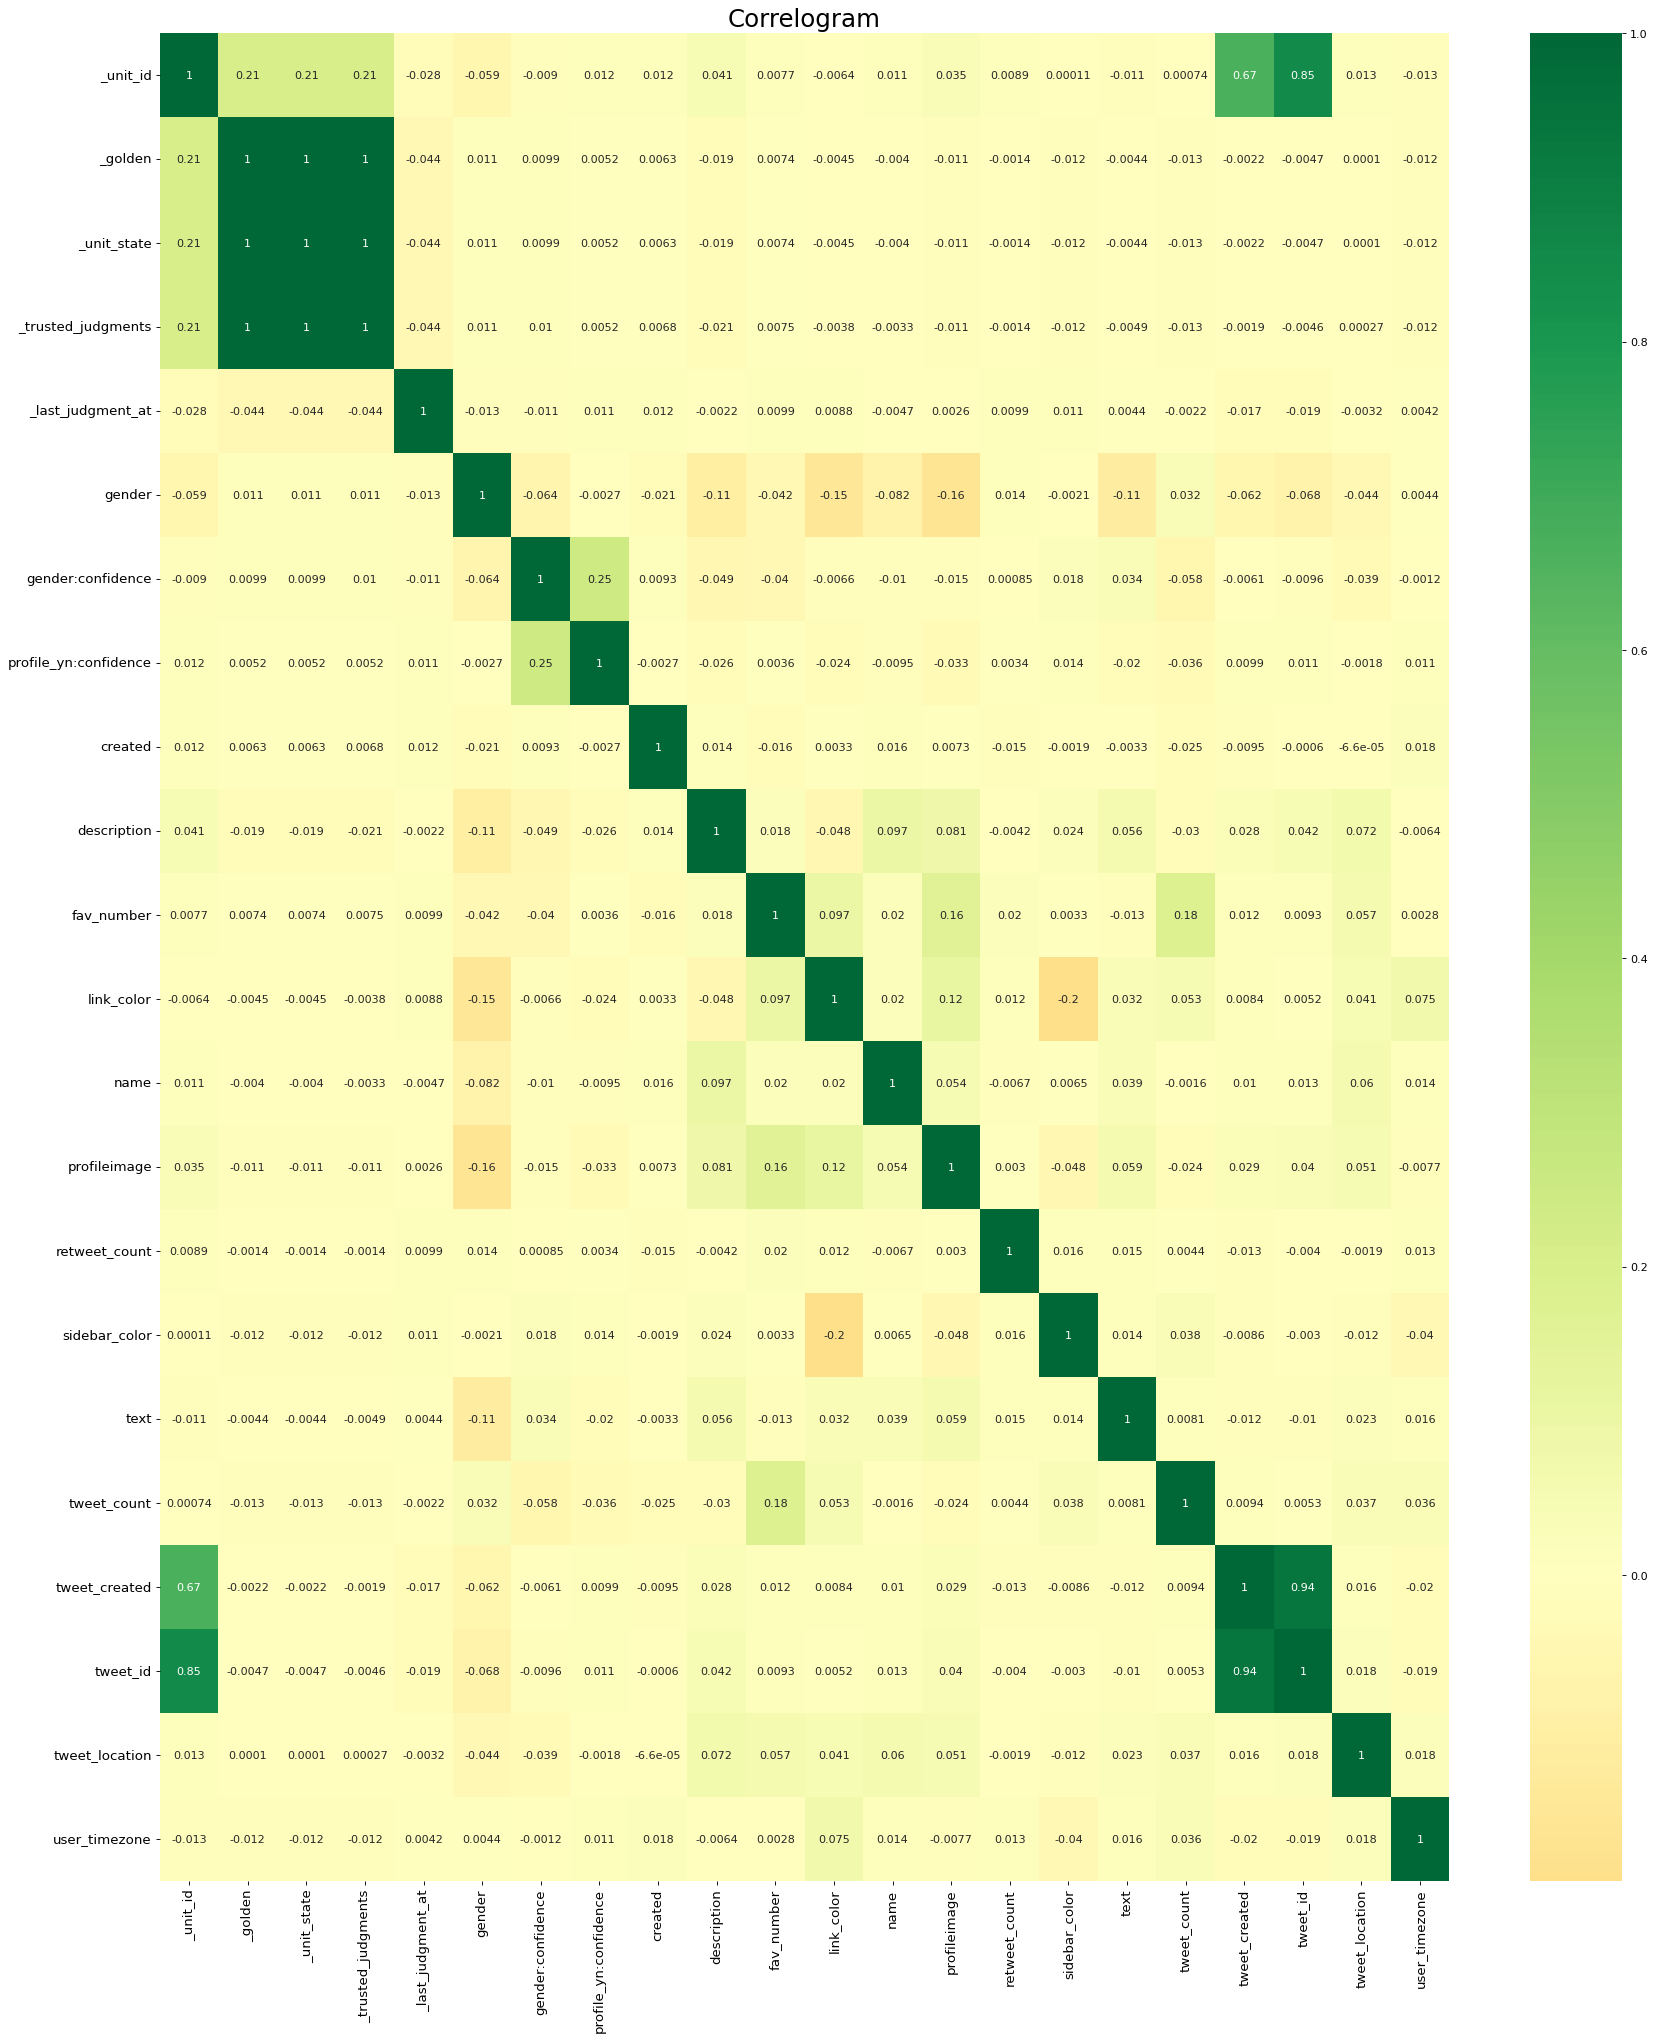

In [40]:
import seaborn as sns
plt.figure(figsize=(26,30), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#Цмфр очень много, тяжело, удалять ничего не буду, пусть будет

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7eb8fcf92c20>, <matplotlib.lines.Line2D object at 0x7eb8fcf93190>], 'caps': [<matplotlib.lines.Line2D object at 0x7eb9073fe590>, <matplotlib.lines.Line2D object at 0x7eb8fcac3730>], 'boxes': [<matplotlib.lines.Line2D object at 0x7eb8fcc0ae00>], 'medians': [<matplotlib.lines.Line2D object at 0x7eb8fcac3d90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7eb8fcac3910>], 'means': []})

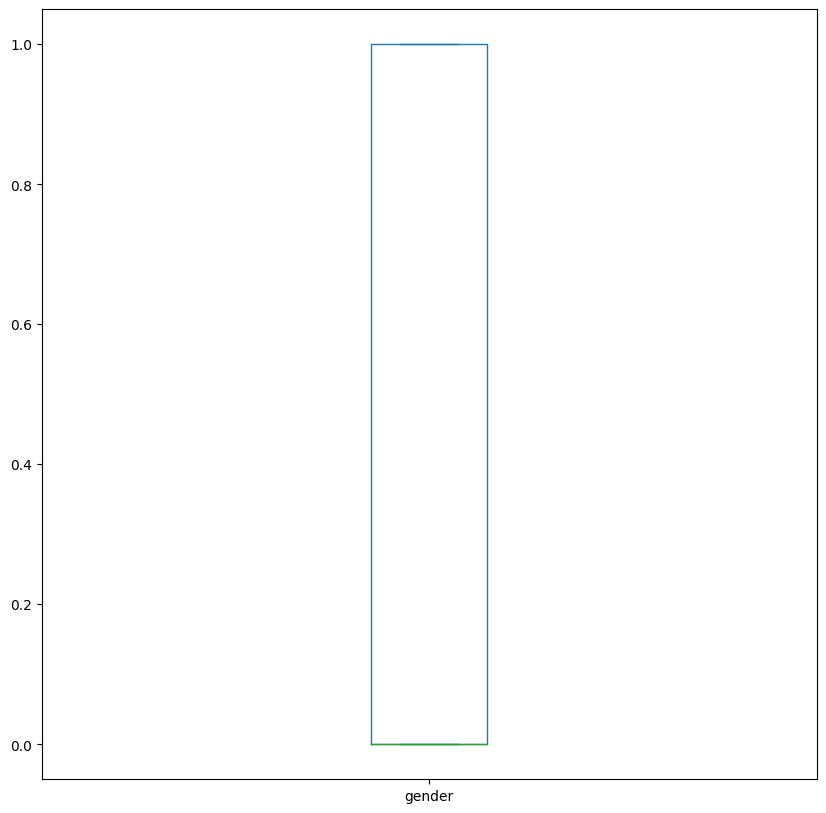

In [41]:
df.gender.plot.box(return_type='both', figsize=(10,10))
#Стоило ожидать подобную картинку, потому что я закодировал лэйбл энкодером

In [69]:
df['gender'].value_counts()

gender
0    6700
1    6194
Name: count, dtype: int64

In [77]:
df.dtypes

_unit_id                   int64
_golden                    int64
_unit_state                int64
_trusted_judgments         int64
_last_judgment_at          int64
gender                     int64
gender:confidence        float64
profile_yn:confidence    float64
created                    int64
description                int64
fav_number                 int64
link_color                 int64
name                       int64
profileimage               int64
retweet_count              int64
sidebar_color              int64
text                       int64
tweet_count                int64
tweet_created              int64
tweet_id                 float64
tweet_location             int64
user_timezone              int64
dtype: object

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Выделим вектор признаков Х и вектор ответов y
X = df.drop(['gender'], axis=1)
y = df['gender']

# train - на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()


model.fit(X_train, y_train)

# тестируем, для признаков у которых нет ответов, мы предсказывает ответ
answers_pred = model.predict(X_test)

In [71]:
model.coef_
#Коэффиценты у признаков

array([[-1.46965579e-28,  3.73315596e-39,  3.73315596e-39,
         3.89809188e-37, -3.92882967e-35, -3.27067270e-37,
        -1.83543035e-37, -2.49222629e-33, -5.25829020e-33,
        -9.03875892e-33, -1.60060807e-33, -5.04631330e-33,
        -9.05951297e-33,  3.04137368e-37, -5.35172445e-35,
        -6.62520668e-33,  2.29043904e-32, -1.62601483e-36,
        -1.18681264e-19, -1.23590503e-33, -9.24386263e-36]])

In [72]:
model.intercept_
#Свободный член

array([-1.80157524e-37])

In [79]:
from sklearn.metrics import accuracy_score

# Как оценить насколько хорошо работает ваша модель?

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(accuracy_score(y_test, answers_pred))

0.5203567274137263


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

array([[1341,    0],
       [1238,    0]])

In [75]:
df_y = pd.DataFrame(y_test)
df_y.value_counts()

gender
0         1341
1         1238
Name: count, dtype: int64

In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
#Прикольные значения

TN: 1341
FP: 0

FN: 1238
TP: 0

TN: 1341
FP: 0
FN: 1238
TP: 0


In [ ]:
#accuracy:
acc=(tp+tn)/(tp+tn+fn+fp)
acc

0.5269484296238852

In [ ]:
#recall
rec=1359/(1359+1220)
rec

0.5269484296238852

In [ ]:
#precision
pre=1359/1359
pre

1.0

Ну модель вышла странная, впринципе пойдет